## **Notebook Goal**

This project focuses on the development of a Machine Learning Model for Stroke Prediction, carried out by the Data Analysis department at Hospital F5.

The stroke prediction model is based on the use of 11 information variables extracted from a dataset containing 4,982 records of positive and negative stroke cases. These variables will be used as features to train and evaluate various Machine Learning classification algorithms.

## **Notebook Content**

0. Importing Libraries and Dataset

1. Basic Understanding of Data

2. Exploratory Data Analysis (EDA)

## **Importing Libraries and Dataset**

In [ ]:
# Data analysis libraries
import numpy as np
import pandas as pd
import math
from scipy import stats
from tabulate import tabulate

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [ ]:
import pandas as pd
path = "stroke_dataset.csv"
df = pd.read_csv(path)

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## **1. Basic Understanding of Data**

1.1. Data Description

1.2. Unique Values in Each Column

1.3. Data Dimension Check

1.4. Data Type Check

🔹 Categorical

🔹 Numeric

🔹 Mixed Data Types

🔹 Errors or Typos

1.5. Duplicate Data Check

1.6. Total Number and Percentage of Missing Values Check

1.7. Cardinality Check of Categorical Features

### **1.1. Data Description**

In [ ]:
# Feature, data type and non-null count
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


This dataset is a table represented as a Pandas DataFrame, with the following characteristics:

**Number of Entries (Rows):** 4981
**Number of Columns (Attributes):** 11

Here are the descriptions of each of the columns:

**gender:** A categorical variable representing the gender of individuals (e.g., male, female, etc.).

**age:** A numerical variable representing the age of individuals in years (data type: float).

**hypertension:** A binary variable (0 or 1) indicating whether the person has hypertension (0 = No, 1 = Yes).

**heart_disease:** A binary variable (0 or 1) indicating whether the person has heart diseases (0 = No, 1 = Yes).

**ever_married:** A categorical variable indicating whether the person has been married before (e.g., Yes or No).

**work_type:** A categorical variable describing the type of job the person has (e.g., private job, government, etc.).

**Residence_type:** A categorical variable describing the type of residence of the person (e.g., urban or rural).

**avg_glucose_level:** A numerical variable representing the average blood glucose level of individuals (data type: float).

**bmi:** A numerical variable representing the body mass index (BMI) of individuals (data type: float).

**smoking_status:** A categorical variable describing the smoking status of individuals (e.g., smoker, ex-smoker, never smoker, etc.).

**stroke:** A binary variable (0 or 1) indicating whether the person has had a stroke (0 = No, 1 = Yes).

In [ ]:
# Summary statistics for numerical features
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


### **1.2.  Unique Values in Each Column**

In [ ]:
# Get unique values for columns that can have them
unique_cols = [
    'gender',
    'hypertension',
    'ever_married',
    'work_type',
    'Residence_type',
    'smoking_status',
    'stroke'
]

unique_values = {}
for col in unique_cols:
    values = df[col].unique()
    unique_values[col] = values

# Convert the dictionary into a list of lists for tabulation
table_data = []
for col, values in unique_values.items():
    table_data.append([col, ', '.join(map(str, values))])

# Print the table
print(tabulate(table_data, headers=["Column", "Unique Values"], tablefmt="grid"))

+----------------+------------------------------------------------+
| Column         | Unique Values                                  |
+================+================================================+
| gender         | Male, Female                                   |
+----------------+------------------------------------------------+
| hypertension   | 0, 1                                           |
+----------------+------------------------------------------------+
| ever_married   | Yes, No                                        |
+----------------+------------------------------------------------+
| work_type      | Private, Self-employed, Govt_job, children     |
+----------------+------------------------------------------------+
| Residence_type | Urban, Rural                                   |
+----------------+------------------------------------------------+
| smoking_status | formerly smoked, never smoked, smokes, Unknown |
+----------------+------------------------------

### **1.3. Data Dimension Check**

In [ ]:
# Number of rows and columns in dataset
df.shape

(4981, 11)

### **1.4. Data Type Check**

In [ ]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
data_types = df.dtypes
categorical_columns = data_types[data_types == 'object'].index.tolist()
numeric_columns = data_types[data_types != 'object'].index.tolist()

print("1. Categorical Columns:", ", ".join(categorical_columns))
print()
print("2. Numeric Columns:", ", ".join(numeric_columns))

1. Categorical Columns: gender, ever_married, work_type, Residence_type, smoking_status

2. Numeric Columns: age, hypertension, heart_disease, avg_glucose_level, bmi, stroke


##### **Categorical**

In [ ]:
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()

In [ ]:
for i in categorical_columns:
    print(f"La columna: {i}")
    print(df[i].value_counts())

La columna: gender
Female    2907
Male      2074
Name: gender, dtype: int64
La columna: ever_married
Yes    3280
No     1701
Name: ever_married, dtype: int64
La columna: work_type
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64
La columna: Residence_type
Urban    2532
Rural    2449
Name: Residence_type, dtype: int64
La columna: smoking_status
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64


**Numeric**

In [ ]:
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

### **1.5. Duplicate Data Check**

In [ ]:
df.duplicated().sum()

0

### **1.6. Missing Values Check**

In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### **1.7. Cardinality Check**

**Cardinality of Numeric Columns**

In [ ]:
print("Column Cardinality:")
print()
print(df.select_dtypes(include=["int", "float64"]).nunique())

Column Cardinality:

age                   104
hypertension            2
heart_disease           2
avg_glucose_level    3895
bmi                   342
stroke                  2
dtype: int64


"The 'age' column has 104 distinct values, which is unusual. Let's check what the maximum and minimum values are.

In [ ]:
max_age = df['age'].max()
min_age = df['age'].min()

print("The maximum value in the 'age' column is:", max_age)
print("The minimum value in the 'age' column is:", min_age)

The maximum value in the 'age' column is: 82.0
The minimum value in the 'age' column is: 0.08


We can see that age ranges from 0 to 82 years, but since it's in float64 format, there are intermediate values. It would be a good idea to round it when performing feature engineering.

It could be considered to fill the 'Unknown' data in the smoking column for all children with 'never smoked'.

There are many children under 2 years old.

In [ ]:
(df[df['age']<2]).age.value_counts()

1.80    9
1.32    8
1.64    8
1.08    7
1.88    7
1.24    7
1.72    6
1.48    6
0.24    5
0.32    5
0.56    5
0.88    5
0.72    5
1.00    5
0.80    4
1.56    4
0.64    4
0.48    3
1.16    3
1.40    3
0.40    2
0.08    2
0.16    1
Name: age, dtype: int64

**Cardinality of Categorical Columns**

In [ ]:
print("Cardinality of categorical columns:")
print()
print(df.select_dtypes(include="object").nunique())

Cardinality of categorical columns:

gender            2
ever_married      2
work_type         4
Residence_type    2
smoking_status    4
dtype: int64


## **2. Exploratory Data Analysis (EDA)**


### **2.1. Analysis of the Target Variable 'stroke'**

Text(0.5, 1.0, "'stroke' Distribution")

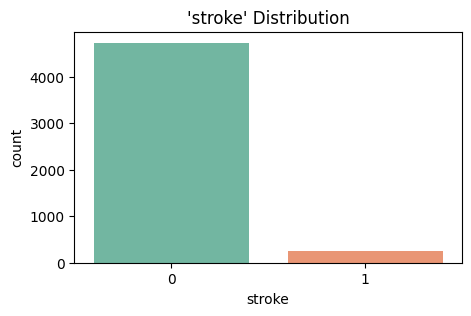

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x="stroke", palette="Set2")
plt.title("'stroke' Distribution")

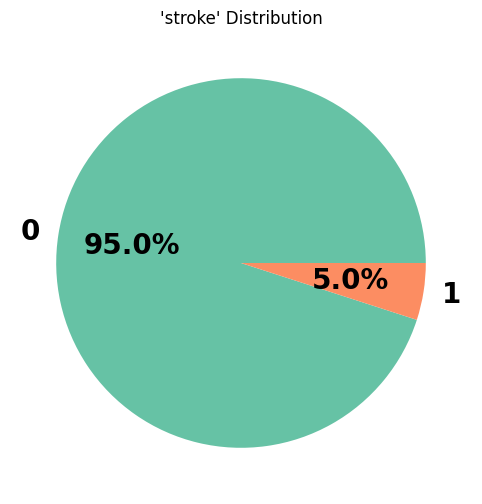

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(df["stroke"].value_counts(),labels=df["stroke"].value_counts().keys(),autopct="%1.1f%%",
       textprops={"fontsize":20,"fontweight":"black"},colors=sns.color_palette("Set2"))
plt.title("'stroke' Distribution")
plt.show()

We can observe that the distribution of the target variable is highly imbalanced, and we will need to use balancing techniques later on.

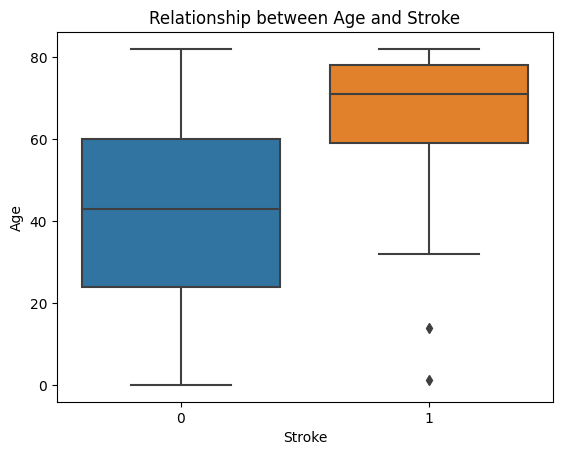

In [ ]:
sns.boxplot(x='stroke', y='age', data=df)
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.title('Relationship between Age and Stroke')
plt.show()

It can be observed that the tendency to have a stroke is found among older individuals. We also notice outliers that we will address later.

In [ ]:
df[(df["age"]<15) & (df["stroke"]==1) ]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
205,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
4807,Female,1.32,0,0,No,children,Urban,70.37,18.7,Unknown,1


There are 2 children under 15 years old who had a stroke. Furthermore, in both cases, the 'smoking_status' column indicates 'unknown'

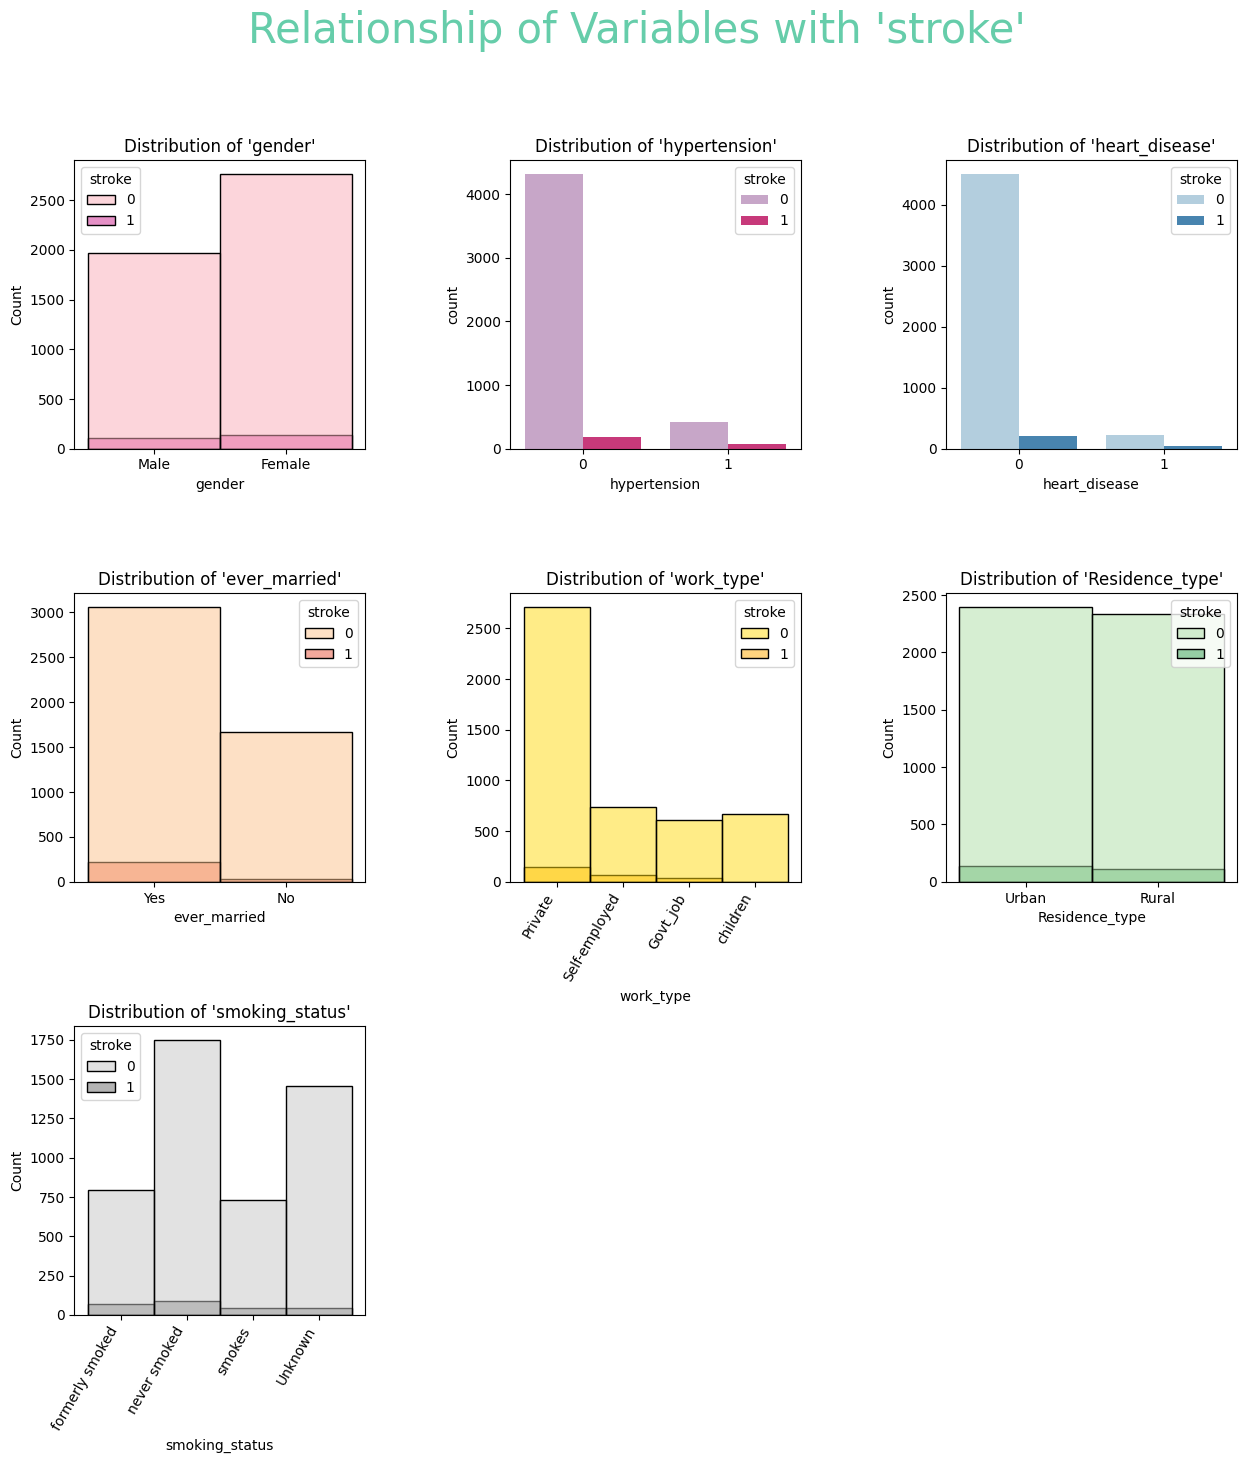

In [ ]:
plt.figure(2, figsize=(15, 15))

plt.suptitle("Relationship of Variables with 'stroke'", fontsize=30, color='mediumaquamarine')

plt.subplot(331)
sns.histplot(data=df, x="gender", hue='stroke', palette="RdPu")
plt.title("Distribution of 'gender'")

plt.subplot(332)
sns.countplot(data=df, x="hypertension", hue='stroke', palette="PuRd")
plt.title("Distribution of 'hypertension'")

plt.subplot(333)
sns.countplot(data=df, x="heart_disease", hue='stroke', palette="Blues")
plt.title("Distribution of 'heart_disease'")

plt.subplot(334)
sns.histplot(data=df, x="ever_married", hue='stroke', palette="OrRd")
plt.title("Distribution of 'ever_married'")

plt.subplot(335)
sns.histplot(data=df, x="work_type", hue='stroke', palette="Wistia")
plt.title("Distribution of 'work_type'")
plt.xticks(rotation=60, ha='right')

plt.subplot(336)
sns.histplot(data=df, x="Residence_type", hue='stroke', palette="Greens")
plt.title("Distribution of 'Residence_type'")

plt.subplot(337)
sns.histplot(data=df, x="smoking_status", hue='stroke', palette="Greys")
plt.title("Distribution of 'smoking_status'")
plt.xticks(rotation=60, ha='right')

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

We can draw the following conclusions:

* We find that there are more women than men; however, there is not a significant difference in the occurrence of strokes between genders.
* The variables of hypertension and heart attack are imbalanced, and we will check later if they need balancing.
* We can observe a higher predisposition to have a stroke if you are married.
* It's evident that since the variables are not equally distributed, the results are not as clear and could lead to errors. Therefore, we will analyze the percentage of strokes for each variable.

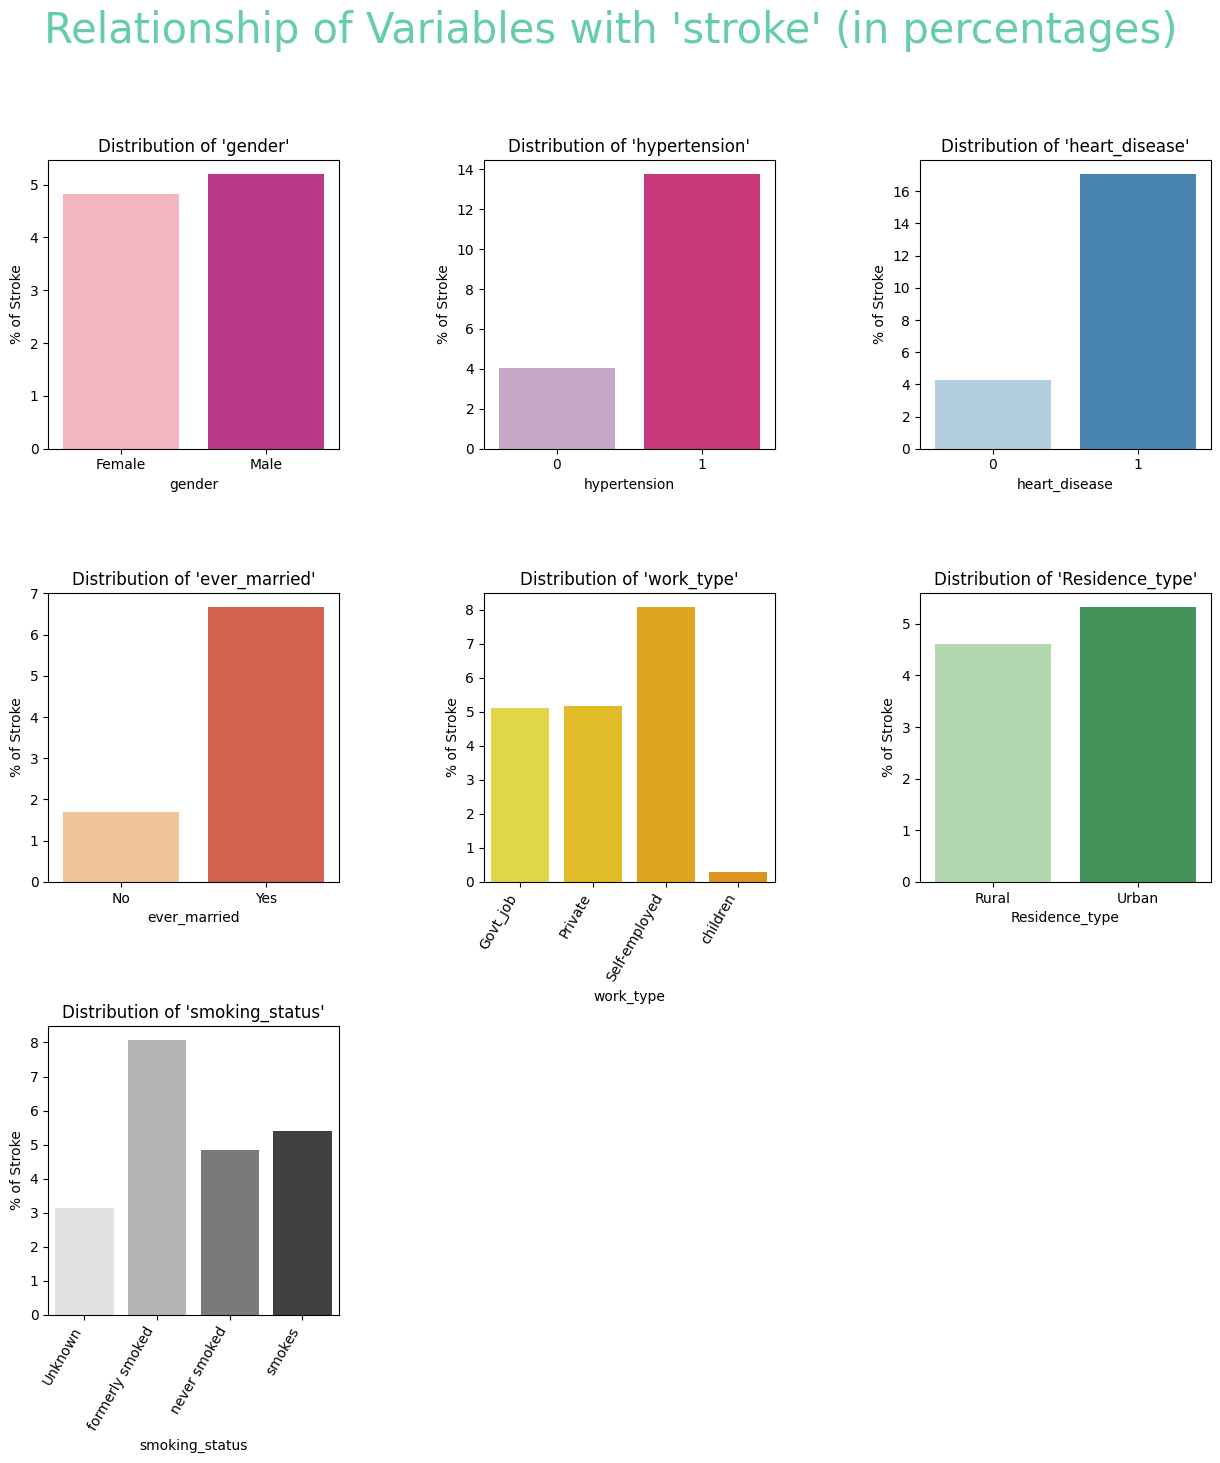

In [ ]:
# Define a function to compute percentages for each category relative to its total
def compute_relative_percentages(column_name):
    category_counts = df.groupby(column_name).size()
    stroke_counts = df[df['stroke'] == 1].groupby(column_name).size()
    percentages = (stroke_counts / category_counts) * 100
    return percentages.reset_index(name='% of Stroke')

# Compute the percentages for the variables
gender_percentages = compute_relative_percentages('gender')
hypertension_percentages = compute_relative_percentages('hypertension')
heart_disease_percentages = compute_relative_percentages('heart_disease')
ever_married_percentages = compute_relative_percentages('ever_married')
work_type_percentages = compute_relative_percentages('work_type')
Residence_type_percentages = compute_relative_percentages('Residence_type')
smoking_status_percentages = compute_relative_percentages('smoking_status')

plt.figure(2, figsize=(15, 15))
plt.suptitle("Relationship of Variables with 'stroke' (in percentages)", fontsize=30, color='mediumaquamarine')

# Plot for 'gender'
plt.subplot(331)
sns.barplot(data=gender_percentages, x="gender", y='% of Stroke', palette="RdPu")
plt.title("Distribution of 'gender'")

# Plot for 'hypertension'
plt.subplot(332)
sns.barplot(data=hypertension_percentages, x="hypertension", y='% of Stroke', palette="PuRd")
plt.title("Distribution of 'hypertension'")

# Plot for 'heart_disease'
plt.subplot(333)
sns.barplot(data=heart_disease_percentages, x="heart_disease", y='% of Stroke', palette="Blues")
plt.title("Distribution of 'heart_disease'")

# Plot for 'ever_married'
plt.subplot(334)
sns.barplot(data=ever_married_percentages, x="ever_married", y='% of Stroke', palette="OrRd")
plt.title("Distribution of 'ever_married'")

# Plot for 'work_type'
plt.subplot(335)
sns.barplot(data=work_type_percentages, x="work_type", y='% of Stroke', palette="Wistia")
plt.title("Distribution of 'work_type'")
plt.xticks(rotation=60, ha='right')

# Plot for 'Residence_type'
plt.subplot(336)
sns.barplot(data=Residence_type_percentages, x="Residence_type", y='% of Stroke', palette="Greens")
plt.title("Distribution of 'Residence_type'")

# Plot for 'smoking_status'
plt.subplot(337)
sns.barplot(data=smoking_status_percentages, x="smoking_status", y='% of Stroke', palette="Greys")
plt.title("Distribution of 'smoking_status'")
plt.xticks(rotation=60, ha='right')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()



### Summary of Findings:

**Gender:** Men have a slightly higher percentage of experiencing a stroke compared to women.

**Hypertension:** Individuals with hypertension are more likely to suffer a stroke.

**Heart Disease:** Those with heart disease show a significantly higher probability of stroke.

**Married:** People who have ever been married have a higher incidence of stroke.

**Work Type:** Self-employed individuals and those in the private sector have a higher percentage of strokes.

**Residence Type:** The difference between urban and rural residents is minimal.

**Smoking Status:** Former smokers and current smokers show similar and higher percentages of strokes compared to those who have never smoked.

Text(0.5, 1.0, "Distribución de 'age'")

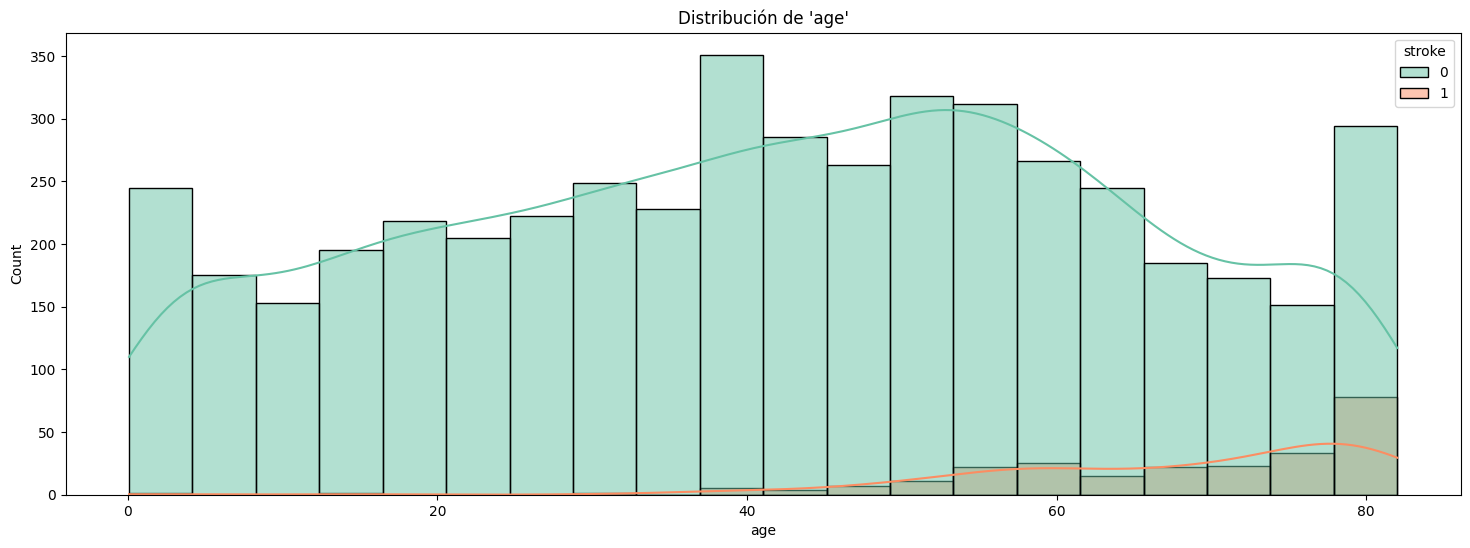

In [ ]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="age",  hue='stroke', palette="Set2", kde=True)
plt.title("Distribución de 'age'")

We can observe that as age increases, the number of stroke cases also increases.

Text(0.5, 1.0, "Distribution of 'avg_glucose_level'")

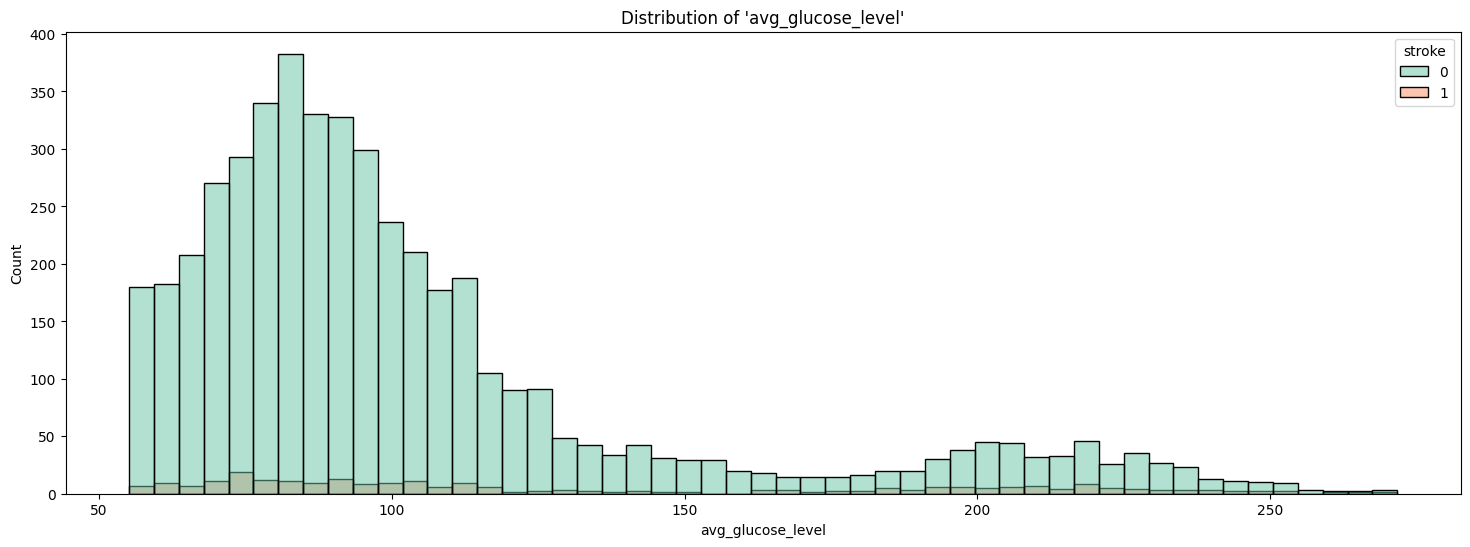

In [ ]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="avg_glucose_level", hue='stroke', palette="Set2")
plt.title("Distribution of 'avg_glucose_level'")

The optimal glucose values are between 70 and 100. Most of the studied population falls within these values. It can also be observed that there is a higher incidence of stroke with high glucose levels. It would be interesting to compare this with the BMI variable.

Text(0.5, 1.0, "'bmi' Distribution")

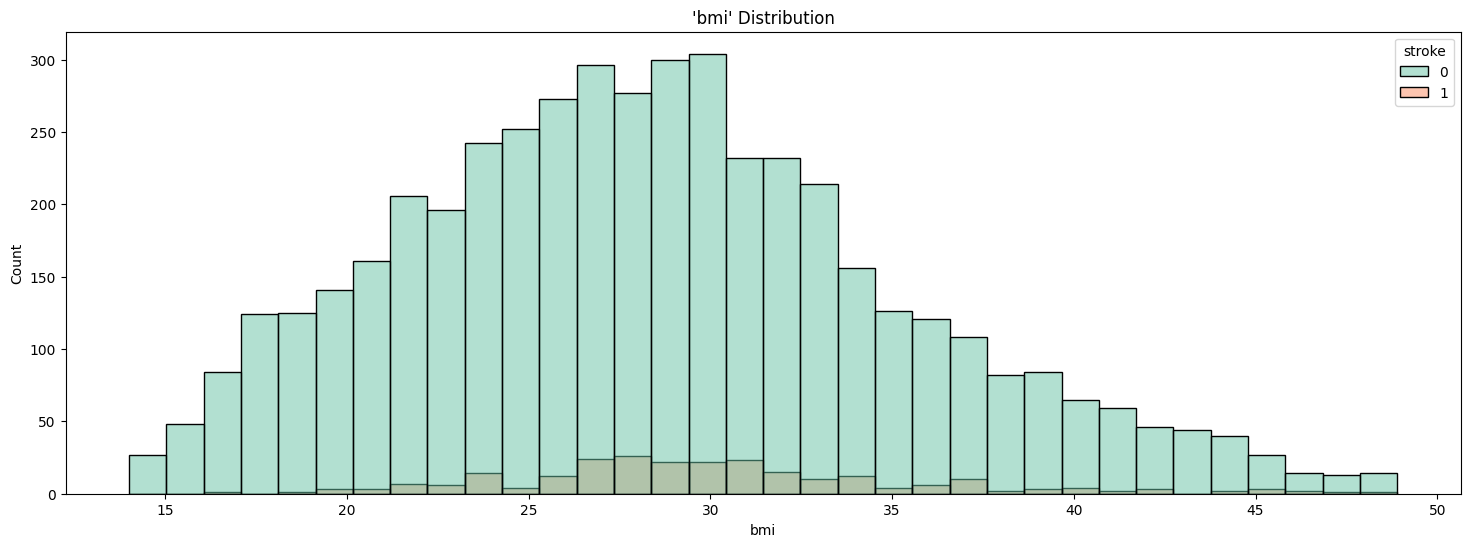

In [ ]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="bmi",  hue='stroke', palette="Set2")
plt.title("'bmi' Distribution")

We can observe that a high BMI has a higher likelihood of experiencing a stroke.

### **Analysis of BMI Distribution in Relation to Stroke Occurrence:**

**Overall Distribution:** The distribution of BMI appears to be approximately normal, with a peak around 25-30.

**Underweight and Stroke:** There are a small number of individuals with underweight (BMI < 18.5) who have experienced a stroke. However, the majority in this BMI range have not had a stroke.

**Normal Weight and Stroke:** In the normal weight range (BMI 18.5 to 24.9), there is a visible proportion of individuals who have had a stroke, but it remains a minority compared to those who have not.

**Overweight and Stroke:** In the overweight range (BMI 25 to 29.9), the number of individuals who have experienced a stroke appears to increase, although the majority have not had a stroke.

**Obesity:** In BMI ranges above 30 (indicating obesity), the number of stroke cases is more prominent compared to lower BMI ranges. However, the proportion of those who have had a stroke is still lower than those who have not.

**Extreme Values:** There are some extreme values in the higher BMI range, but it is difficult to draw definite conclusions from these without further analysis.

**Conclusion:** A higher BMI seems to be associated with a higher occurrence of strokes.


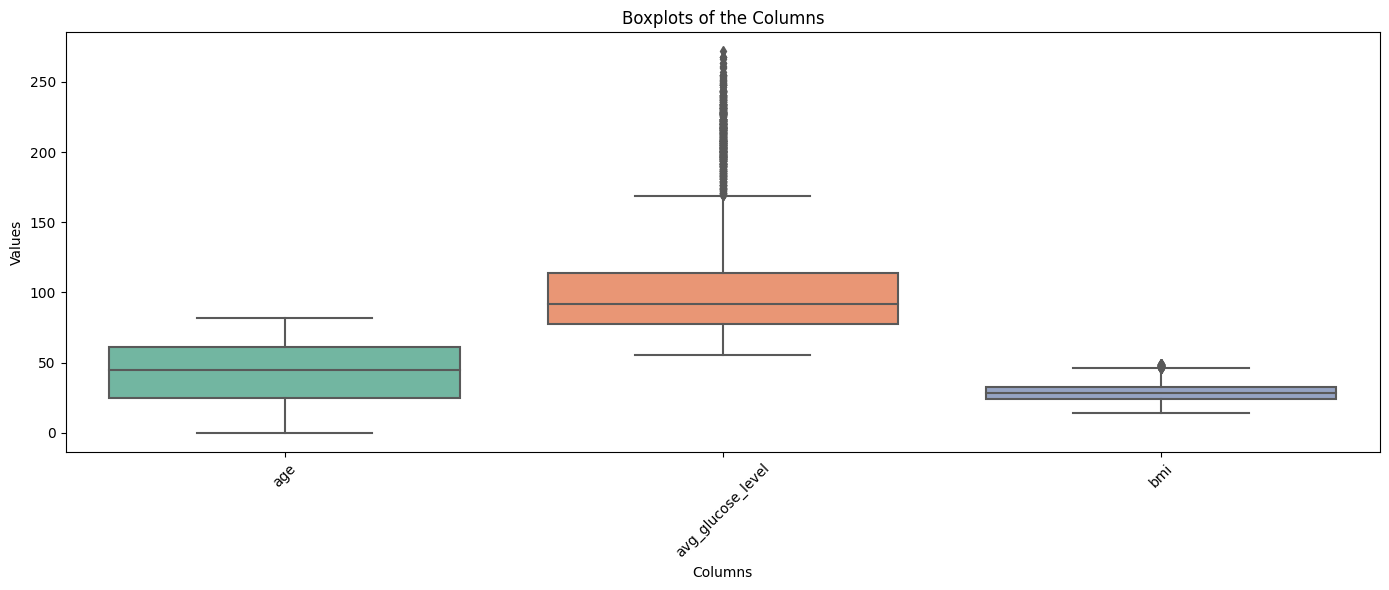

In [ ]:
columns_boxplot = df[['age', 'avg_glucose_level', 'bmi']]

# Set the figure size
plt.figure(figsize=(14, 6))

# Create boxplots for the 4 columns
sns.boxplot(data=columns_boxplot, orient="v", palette="Set2")

# Configure axis labels and title
plt.xticks(rotation=45)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Boxplots of the Columns")

# Show the plot
plt.tight_layout()
plt.show()

We can observe that there are outliers in the values of 'avg_glucose_level' and 'bmi' which we will investigate further later on.

In [ ]:
fig = px.scatter_3d(df, x='age', y='avg_glucose_level', z='bmi',
              color='stroke', color_continuous_scale='bluered', opacity=0.5)
fig.show()

**Observations**

The variable that most affects stroke cases is age.

We can also see more cases of stroke at high and low glucose values. However, when examining the red data points in both cases more closely, we notice that they coincide with older individuals. In other words, high and low glucose values occur more frequently in elderly individuals, which explains the higher incidence of stroke.